<a href="https://colab.research.google.com/github/MittalNeha/EIP4/blob/master/EIP4_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_test.shape

(10000, 28, 28)

(60000, 28, 28)


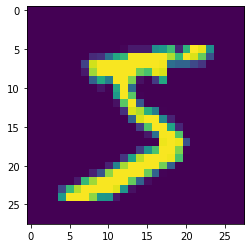

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

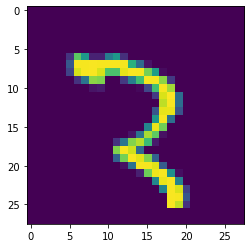

In [6]:
plt.imshow(X_train[500])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Convolution2D(64, 1, 1, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 64)        4160      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
flatten_4 (Flatten)          (None, 16384)            

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [37]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 24s 397us/step - loss: 0.0972 - acc: 0.9701
Epoch 2/10
60000/60000 [==============================] - 23s 379us/step - loss: 0.0378 - acc: 0.9886
Epoch 3/10
60000/60000 [==============================] - 23s 377us/step - loss: 0.0256 - acc: 0.9921
Epoch 4/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.0201 - acc: 0.9936
Epoch 5/10
60000/60000 [==============================] - 23s 375us/step - loss: 0.0146 - acc: 0.9957
Epoch 6/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.0132 - acc: 0.9959
Epoch 7/10
60000/60000 [==============================] - 23s 377us/step - loss: 0.0096 - acc: 0.9973
Epoch 8/10
60000/60000 [==============================] - 23s 377us/step - loss: 0.0119 - acc: 0.9963
Epoch 9/10
60000/60000 [==============================] - 22s 374us/step - loss: 0.0081 - acc: 0.9978
Epoch 10/10
60000/60000 [==============================] - 23s 378us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [39]:
print(score)

[0.045443441226987465, 0.9923]


In [0]:
 y_pred = model.predict(X_test)

In [19]:
print(y_pred[:9])
print(y_test[:9])

[[1.00255475e-16 4.20970123e-14 1.55397327e-11 2.49872388e-13
  1.71834427e-18 1.29726725e-18 1.71535509e-21 1.00000000e+00
  6.85905732e-14 4.00391442e-10]
 [9.37318520e-17 8.50125688e-13 1.00000000e+00 7.07084989e-18
  1.45815495e-20 1.16168271e-27 4.31045182e-18 1.12732780e-15
  4.95415137e-18 3.18359277e-19]
 [1.19244603e-09 9.99999285e-01 3.50735170e-11 1.65204352e-12
  7.90052965e-08 1.62960248e-07 6.27252916e-10 1.78247674e-08
  4.98762518e-07 1.67358946e-10]
 [1.00000000e+00 5.88585460e-16 2.24014167e-12 6.24806071e-16
  8.30866205e-14 2.63612455e-13 1.01435188e-11 2.27633434e-16
  1.32178187e-14 2.30412542e-12]
 [1.64685553e-13 1.13207414e-12 2.13703257e-15 1.58843414e-16
  9.99999762e-01 2.12202665e-13 3.56390473e-11 6.72886234e-15
  2.22536399e-12 2.17934641e-07]
 [6.92167879e-10 9.99999642e-01 1.59206051e-10 8.20839978e-14
  2.48051375e-08 4.36999859e-09 2.12172502e-11 3.08992405e-08
  2.68619260e-07 3.70403846e-10]
 [3.33838980e-20 2.19314233e-10 1.03464472e-16 1.51099150e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored